# Template for analysis notebook


## Step 1: Prepare environment


- Set up the runtime


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
import sys

project_dir = os.getcwd()
while not os.path.exists(os.path.join(project_dir, ".git")):
    project_dir = os.path.dirname(project_dir)
print(f"Project directory: {project_dir}")
sys.path.insert(0, project_dir)

Project directory: /home/xj265/phd/codebase/Euphratica/Euphratica-dev


- Import customised libraries


In [3]:
import lingam
import numpy as np
import pandas as pd
from lingam.utils import make_dot
from tabeval.plugins import Plugins

## Step 2: Specify the results of interest

* GT causal graph of the data

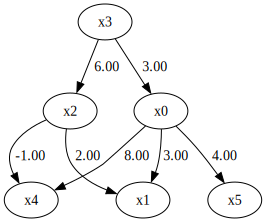

In [4]:
m = np.array(
    [
        [0.0, 0.0, 0.0, 3.0, 0.0, 0.0],
        [3.0, 0.0, 2.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 6.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [8.0, 0.0, -1.0, 0.0, 0.0, 0.0],
        [4.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    ]
)

dot = make_dot(m)

# # Save pdf
# dot.render("dag")

# # Save png
# dot.format = "png"
# dot.render("dag")

dot

* Generate the data with known causal structure

In [5]:
x3 = np.random.uniform(size=1000)
x0 = 3.0 * x3 + np.random.uniform(size=1000)
x2 = 6.0 * x3 + np.random.uniform(size=1000)
x1 = 3.0 * x0 + 2.0 * x2 + np.random.uniform(size=1000)
x5 = 4.0 * x0 + np.random.uniform(size=1000)
x4 = 8.0 * x0 - 1.0 * x2 + np.random.uniform(size=1000)
X = pd.DataFrame(np.array([x0, x1, x2, x3, x4, x5]).T, columns=["x0", "x1", "x2", "x3", "x4", "x5"])
X.head()

,x0,x1,x2,x3,x4,x5
0,3.202848,22.854805,6.427770,0.993039,19.641298,13.305871
1,3.217161,21.784452,5.794593,0.948473,20.481265,13.314621
2,3.220023,20.241581,5.060788,0.796272,21.104802,13.084657
3,1.644764,8.674112,1.661672,0.229072,12.132156,7.066599
4,1.272907,9.281740,2.384406,0.337687,8.601990,5.131803


## Step 3: Export results


* Generate synthetic data with SCM

In [6]:
plugin = Plugins().get("scm", cd_method="direct-lingam")
plugin.fit(X, task_type="regression")

In [7]:
syn_loader = plugin.generate(1000)
X = syn_loader.dataframe()
X.head()

,x0,x1,x2,x3,x4,x5
0,2.139499,14.623853,3.908991,0.548814,9.856119,8.860105
1,2.811492,17.407129,4.331472,0.715189,13.097219,11.824928
2,2.629319,16.204944,4.117920,0.602763,10.648771,10.666323
3,2.495043,15.853570,4.001133,0.544883,9.098859,10.340924
4,2.148678,11.881998,2.603836,0.423655,8.039785,8.657436


* Analyse the causal structures of synthetic data from SCM

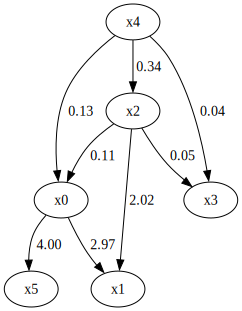

In [8]:
cd_method = lingam.DirectLiNGAM()
cd_method.fit(X)
make_dot(cd_method.adjacency_matrix_)